# 挑战：分析关于数据科学的文本

> *在本笔记本中，我们尝试使用不同的URL——维基百科上关于机器学习的文章。你会发现，与数据科学不同，这篇文章包含了许多术语，这使得分析变得更加复杂。我们需要在完成关键词提取后，想出另一种方法来清理数据，以去除一些频繁但无意义的词组。*

在这个例子中，让我们做一个简单的练习，涵盖传统数据科学流程的所有步骤。你不需要编写任何代码，只需点击下面的单元格来执行它们并观察结果。作为一个挑战，我们鼓励你尝试用不同的数据运行这些代码。

## 目标

在本节课中，我们讨论了与数据科学相关的不同概念。现在让我们通过**文本挖掘**来发现更多相关概念。我们将从一段关于数据科学的文本开始，从中提取关键词，然后尝试可视化结果。

作为文本来源，我将使用维基百科上关于数据科学的页面：


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## 第一步：获取数据

数据科学流程的第一步是获取数据。我们将使用 `requests` 库来完成这一任务：


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## 第2步：转换数据

下一步是将数据转换为适合处理的形式。在我们的案例中，我们已经从页面下载了HTML源代码，现在需要将其转换为纯文本。

实现这一目标的方法有很多。我们将使用Python中最简单的内置对象 [HTMLParser](https://docs.python.org/3/library/html.parser.html)。我们需要继承`HTMLParser`类，并定义代码以收集HTML标签内的所有文本，排除`<script>`和`<style>`标签中的内容。


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## 第三步：获取洞察

最重要的一步是将数据转化为可以提取洞察的形式。在我们的案例中，我们希望从文本中提取关键词，并查看哪些关键词更有意义。

我们将使用一个名为 [RAKE](https://github.com/aneesha/RAKE) 的 Python 库来进行关键词提取。首先，如果尚未安装该库，我们需要安装它：


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


主要功能可通过 `Rake` 对象实现，我们可以使用一些参数进行自定义。在我们的例子中，我们将关键词的最小长度设置为5个字符，关键词在文档中的最小频率设置为3，关键词的最大单词数设置为2。可以随意尝试其他值并观察结果。


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

我们获得了一份术语列表，并附有其相关的重要性程度。正如你所看到的，最相关的领域，例如机器学习和大数据，位于列表的顶部位置。

## 第四步：结果可视化

人们通常通过视觉形式来最好地理解数据。因此，将数据可视化以获取一些洞察通常是有意义的。我们可以使用 Python 中的 `matplotlib` 库来绘制关键词及其相关性的简单分布图：


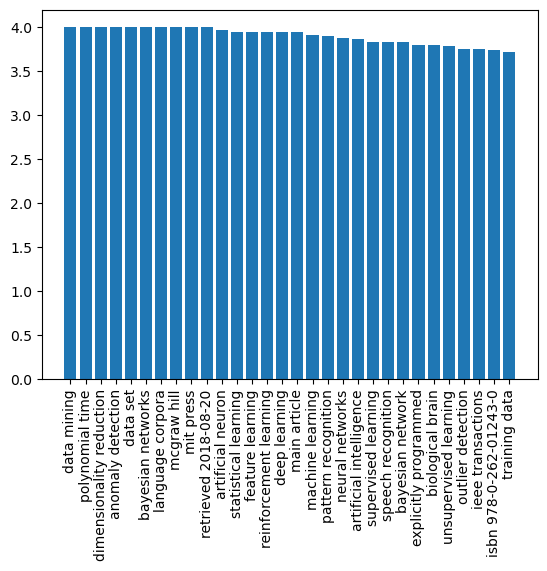

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

然而，还有一种更好的方法来可视化词频——使用**词云**。我们需要安装另一个库来从我们的关键词列表中绘制词云。


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`对象负责接收原始文本或预先计算的单词及其频率列表，并返回一个图像，该图像可以使用`matplotlib`显示：


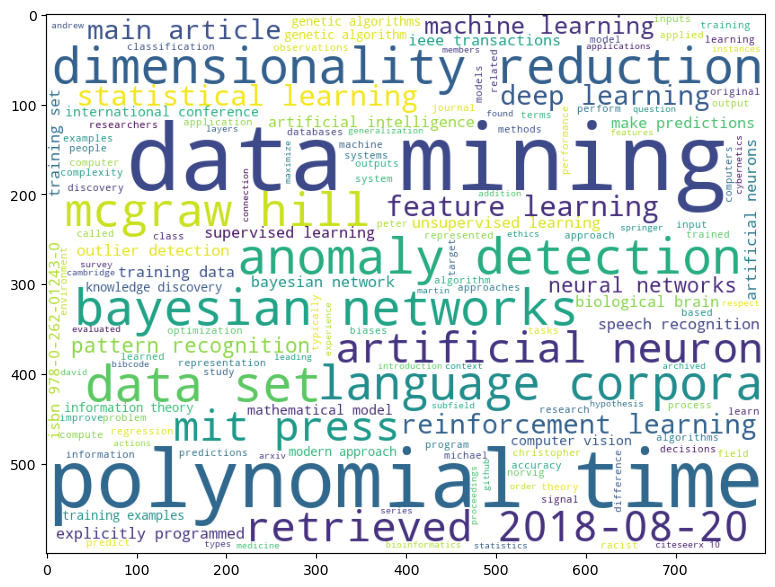

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

我们也可以将原始文本传递给 `WordCloud` - 让我们看看是否能够得到类似的结果：


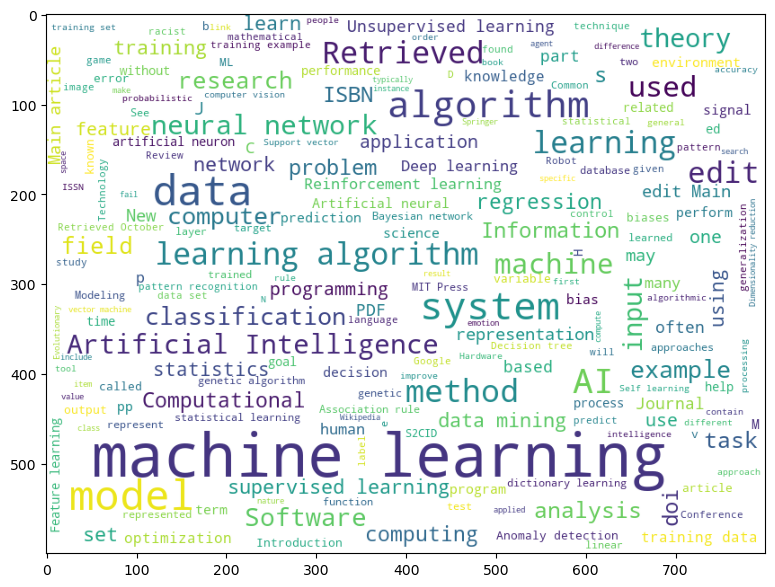

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

你可以看到现在的词云看起来更吸引人，但它也包含了很多噪音（例如，像 `Retrieved on` 这样的无关词）。此外，我们得到的由两个词组成的关键词更少，比如 *数据科学家* 或 *计算机科学*。这是因为 RAKE 算法在从文本中选择优质关键词方面表现得更好。这个例子说明了数据预处理和清理的重要性，因为最终清晰的结果将帮助我们做出更好的决策。

在这个练习中，我们通过一个简单的过程，从维基百科文本中提取了一些意义，以关键词和词云的形式呈现。这个例子虽然很简单，但很好地展示了数据科学家在处理数据时通常会经历的所有步骤，从数据获取到可视化。

在我们的课程中，我们将详细讨论所有这些步骤。



---

**免责声明**：  
本文档使用AI翻译服务 [Co-op Translator](https://github.com/Azure/co-op-translator) 进行翻译。尽管我们努力确保翻译的准确性，但请注意，自动翻译可能包含错误或不准确之处。原始语言的文档应被视为权威来源。对于关键信息，建议使用专业人工翻译。我们不对因使用此翻译而产生的任何误解或误读承担责任。
